<a id='Top'></a>
# Chapter 15 - Advanced Functions
<div class="alert alert-block alert-danger" style="margin-top: 20px">
<font color=black>

- 15.1. [Introduction: Optional Parameters](#15.1)  
- 15.2. [Keyword Parameters](#15.2)
  - 15.2.1. [Keyword Parameters with .format](#15.2.1)
- 15.3. [Anonymous functions with lambda expressions](#15.3)
- 15.4. 👩‍💻 [Programming With Style](#15.4)
- 15.5. [Method Invocations](#15.5)
- 15.6. [Exercises](#15.6)
- 15.7. [Chapter Assessment](#15.7)</div>

<a id='15.1'></a>
## 15.1. Introduction: Optional Parameters
In the treatment of functions so far, each function definition specifies zero or more formal parameters and each function invocation provides exactly that many values. Sometimes it is convenient to have __optional parameters__ that can be specified or omitted. When an optional parameter is omitted from a function invocation, the formal parameter is bound to a __default value__. When the optional parameter is included, then the formal parameter is bound to the value provided. Optional parameters are convenient when a function is almost always used in a simple way, but it’s nice to allow it to be used in a more complex way, with non-default values specified for the optional parameters.

Consider, for example, the <font color=red>int</font> function, which you have used previously. Its first parameter, which is required, specifies the object that you wish to convert to an integer. For example, if you call in on a string, <font color=red>int("100")</font>), the return value will be the integer 100.

That’s the most common way programmers want to convert strings to integers. Sometimes, however, they are working with numbers in some other “base” rather than base 10. For example, in base 8, the rightmost digit is ones, the next digit to the left is 8s, and the one to the left of that is the 64s place (8**2).

The int function provides an optional parameter for the base. When it is not specified, the number is converted to an integer assuming the original number was in base 10. We say that 10 is the default value. So <font color=red>int("100")</font> is the same as invoking <font color=red>int("100", 10)</font>. We can override the default of 10 by supplying a different value.

In [ ]:
print(int("100"))
print(int("100", 10))   # same thing, 10 is the default value for the base
print(int("100", 8))     # now the base is 8, so the result is 1*64 = 64

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font color=black><b>Note</b><br>
Tom Lehrer’s New Math<br>  
Some math educators believe that elementary school students will get a much deeper understanding of the place-value system, and set a foundation for learning algebra later, if they learn to do arithmetic not only in base-10 but also in base-8 and other bases. This was part of a movement called “The New Math”, though it’s not so new now (I had it when I was in elementary school!) Tom Lehrer made a really funny song about it, and it’s set with visuals in several YouTube renditions now. Try this very nice </font><font color=blue>lip-synched version</font>.
</div>

When defining a function, you can specify a default value for a parameter. That parameter then becomes an optional parameter when the function is called. The way to specify a default value is with an assignment statement inside the parameter list. Consider the following code, for example.

Notice the different bindings of x, y, and z on the three invocations of f. The first time, y and z have their default values, 3 and 7. The second time, y gets the value 5 that is passed in, but z still gets the default value of 7. The last time, z gets the value 8 that is passed in.

If you want to provide a non-default value for the third parameter (z), you also need to provide a value for the second item (y). We will see in the next section a mechanism called keyword parameters that lets you specify a value for z without specifying a value for y.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font color=black><b>Note</b><br>
This is a second, related but slightly different use of = than we have seen previously. In a stand-alone assignment statement, not part of a function definition, <font color=red>x=3</font> assigns 3 to the variable x. As part of specifying the parameters in a function definition, <font color=red>x=3</font> says that 3 is the default value for x, used only when no value is provided during the function invocation.</font>
</div>

There are two tricky things that can confuse you with default values. The first is that the default value is determined at the time that the function is defined, not at the time that it is invoked. So in the example above, if we wanted to invoke the function f with a value of 10 for z, we cannot simply set initial = 10 right before invoking f. See what happens in the code below, where z still gets the value 7 when f is invoked without specifying a value for z.

The second tricky thing is that if the default value is set to a mutable object, such as a list or a dictionary, that object will be shared in all invocations of the function. This can get very confusing, so I suggest that you never set a default value that is a mutable object. For example, follow the exceution of this one carefully.

When the default value is used, the same list is shared. But on lines 8 and 9 two different copies of the list [“Hello”] are provided, so the 4 that is appended is not present in the list that is printed on line 9.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What will the following code print?</font>

In [ ]:
def f(x = 0, y = 1):
    return x * y

print(f())

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 0    
B. 1  
C. None  
D. Runtime error since no parameters are passed in the call to f.


<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. 0  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Since no parameters are specified, x is 0 and y is 1, so 0 is returned.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What will the following code print?</font>

In [ ]:
def f(x = 0, y = 1):
    return x * y

print(f(1))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 0  
B. 1    
C. None  
D. Runtime error since the second parameter value is missing.


<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. 1  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Since one parameter value is specified, it is bound to x; y gets the default value of 1.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>  

3. Write a function called <font color=red>str_mult</font> that takes in a required string parameter and an optional integer parameter. The default value for the integer parameter should be 3. The function should return the string multiplied by the integer parameter.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def str_mult(astring, opt=3):
    return astring * opt
```

</details>

<a id='15.2'></a>
## 15.2. Keyword Parameters
[Back to top](#Top)

In the previous section, on <font color=blue>Optional Parameters</font> you learned how to define default values for formal parameters, which made it optional to provide values for those parameters when invoking the functions.

In this chapter, you’ll see one more way to invoke functions with optional parameters, with keyword-based parameter passing. This is particularly convenient when there are several optional parameters and you want to provide a value for one of the later parameters while not providing a value for the earlier ones.

The online official python documentation includes a tutorial on optional parameters which covers the topic quite well. Please read the content there: Keyword arguments

Don’t worry about the <font color=red>def cheeseshop(kind, \*arguments, \*\*keywords)</font>: example. You should be able to get by without understanding <font color=red>\*parameters</font> and <font color=red>\*\*parameters</font> in this course. But do make sure you understand the stuff above that.

The basic idea of passing arguments by keyword is very simple. When invoking a function, inside the parentheses there are always 0 or more values, separated by commas. With keyword arguments, some of the values can be of the form <font color=red>paramname = \<expr></font> instead of just <font color=red>\<expr></font>. Note that when you have <font color=red>paramname = \<expr></font> in a function definition, it is defining the default value for a parameter when no value is provided in the invocation; when you have <font color=red>paramname = \<expr></font> in the invocation, it is supplying a value, overriding the default for that paramname.

To make it easier to follow the details of the examples in the official python tutorial, you can step through them in CodeLens.
    
As you step through it, each time the function is invoked, make a prediction about what each of the four parameter values will be during execution of lines 2-5. Then, look at the stack frame to see what they actually are during the execution.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font color=black><b>Note</b><br> 
Note that we have yet another, slightly different use of the = sign here. As a stand-alone, top-level statement, <font color=red>x=3</font>, the variable x is set to 3. Inside the parentheses that invoke a function, <font color=red>x=3</font> says that 3 should be bound to the local variable x in the stack frame for the function invocation. Inside the parentheses of a function definition, <font color=red>x=3</font> says that 3 should be the value for x in every invocation of the function where no value is explicitly provided for x.

<a id='15.2.1'></a>
### 15.2.1. Keyword Parameters with .format
[Back to top](#Top)

Earlier you learned how to use the <font color=red>format</font> method for strings, which allows you to structure strings like fill-in-the-blank sentences. Now that you’ve learned about optional and keyword parameters, we can introduce a new way to use the <font color=red>format</font> method.

This other option is to specifically refer to keywords for interpolation values, like below.

In [ ]:
names_scores = [("Jack",[67,89,91]),("Emily",[72,95,42]),("Taylor",[83,92,86])]

for name, scores in names_scores:
    print("The scores {nm} got were: {s1},{s2},{s3}.".format(nm=name,s1=scores[0],s2=scores[1],s3=scores[2]))

Sometimes, you may want to use the <font color=red>.format</font> method to insert the same value into a string multiple times. You can do this by simply passing the same string into the format method, assuming you have included <font color=red>{}</font> s in the string everywhere you want to interpolate them. But you can also use positional passing references to do this! The order in which you pass arguments into the <font color=red>format</font> method matters: the first one is argument <font color=red>0</font>, the second is argument <font color=red>1</font>, and so on.

For example,

In [ ]:
# this works
names = ["Jack","Jill","Mary"]
for n in names:
    print("'{}!' she yelled. '{}! {}, {}!'".format(n,n,n,"say hello"))

# but this also works!
names = ["Jack","Jill","Mary"]
for n in names:
    print("'{0}!' she yelled. '{0}! {0}, {1}!'".format(n,"say hello"))

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What value will be printed for z?</font>

In [ ]:
initial = 7
def f(x, y = 3, z = initial):
    print("x, y, z are:", x, y, z)
f(2, 5)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 2  
B. 3  
C. 5  
D. 7    
E. Runtime error since not enough values are passed in the call to f


<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. 7  
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ 2 is bound to x, 5 to y, and z gets its default value, 7</div>

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What value will be printed for y?</font>

In [ ]:
initial = 7
def f(x, y = 3, z = initial):
    print("x, y, z are:", x, y, z)
f(2, z = 10)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 2  
B. 3    
C. 5  
D. 10  
E. Runtime error since no value is provided for y, which comes before z


<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. 3  
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ 3 is the default value for y, and no value is specified for y.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
3. What value will be printed for x?</font>

In [ ]:
initial = 7
def f(x, y = 3, z = initial):
    print("x, y, z are:", x, y, z)
f(2, x=5)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 2  
B. 3  
C. 5  
D. 7  
E. Runtime error since two different values are provided for x


<details><summary>Click here for the solution</summary>

<font color=red>► </font>E. Runtime error since two different values are provided for x
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ 2 is bound to x since it's the first value, but so is 5, based on keyword.</div>

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
4. What value will be printed for z?</font>

In [ ]:
initial = 7
def f(x, y = 3, z = initial):
    print ("x, y, z are:", x, y, z)
initial = 0
f(2)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
A. 2  
B. 7    
C. 0  
D. Runtime error since two different values are provided for initial.


<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. 7  
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ the default value for z is determined at the time the function is defined; at that time initial has the value 0.</div>

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
5. What value will be printed below?</font>

In [ ]:
names = ["Alexey", "Catalina", "Misuki", "Pablo"]

print("'{first}!' she yelled. 'Come here, {first}! {f_one}, {f_two}, and {f_three} are here!'".format(first=names[1], 
                                                                                                      f_one=names[0], 
                                                                                                      f_two=names[2], 
                                                                                                      f_three=names[3]))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
 
A. 'first!' she yelled. 'Come here, first! f_one, f_two, and f_three are here!'  
B. 'Alexey!' she yelled. 'Come here, Alexey! Catalina, Misuki, and Pablo are here!'  
C. 'Catalina!' she yelled. 'Come here, Catalina! Alexey, Misuki, and Pablo are here!'    
D. There is an error. You cannot repeatedly use the keyword parameters.


<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. 'Catalina!' she yelled. 'Come here, Catalina! Alexey, Misuki, and Pablo are here!' 
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the keyword parameters will determine the order of the strings.</div>

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
6. Define a function called <font color=red>multiply</font>. It should have one required parameter, a string. It should also have one optional parameter, an integer, named <font color=red>mult_int</font>, with a default value of 10. The function should return the string multiplied by the integer. (i.e.: Given inputs “Hello”, mult_int=3, the function should return “HelloHelloHello”)

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def multiply(astring, mult_int=10):
    return astring * mult_int
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
7. Currently the function is supposed to take 1 required parameter, and 2 optional parameters, however the code doesn’t work. Fix the code so that it passes the test. This should only require changing one line of code.

In [ ]:
def waste(var = "Water", mar, marble = "type"):
    final_string = var + " " + marble + " " + mar
    return final_string

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def waste(mar, var = "Water", marble = "type"):
    final_string = var + " " + marble + " " + mar
    return final_string    
```

</details>


<a id='15.3'></a>
## 15.3. Anonymous functions with lambda expressions
[Back to top](#Top)

To further drive home the idea that we are passing a function object as a parameter to the sorted object, let’s see an alternative notation for creating a function, a __lambda expression__. The syntax of a lambda expression is the word “lambda” followed by parameter names, separated by commas but not inside (parentheses), followed by a colon and then an expression. <font color=red>lambda arguments: expression</font> yields a function object. This unnamed object behaves just like the function object constructed below.

In [ ]:
def fname(arguments):
    return expression

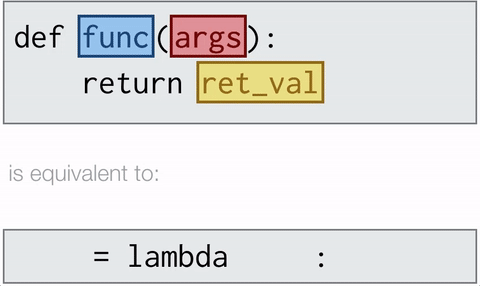

Consider the following code

In [ ]:
def f(x):
    return x - 1

print(f)
print(type(f))
print(f(3))

print(lambda x: x-2)
print(type(lambda x: x-2))
print((lambda x: x-2)(6))

Note the paralells between the two. At line 4, f is bound to a function object. Its printed representation is “\<function f>”. At line 8, the lambda expression produces a function object. Because it is unnamed (anonymous), its printed representation doesn’t include a name for it, “\<function \<lambda>>”. Both are of type ‘function’.

A function, whether named or anonymous, can be called by placing parentheses () after it. In this case, because there is one parameter, there is one value in parentheses. This works the same way for the named function and the anonymous function produced by the lambda expression. The lambda expression had to go in parentheses just for the purposes of grouping all its contents together. Without the extra parentheses around it on line 10, the interpreter would group things differently and make a function of x that returns x - 2(6).

Some students find it more natural to work with lambda expressions than to refer to a function by name. Others find the syntax of lambda expressions confusing. It’s up to you which version you want to use though you will need to be able to read and understand lambda expressions that are written by others. In all the examples below, both ways of doing it will be illustrated.

Say we want to create a function that takes a string and returns the last character in that string. What might this look like with the functions you’ve used before?

In [ ]:
def last_char(s):
    return s[-1]

To re-write this using lambda notation, we can do the following:

In [ ]:
last_char = (lambda s: s[-1])

Note that neither function is actually invoked. Look at the parallels between the two structures. The parameters are defined in both functions with the variable s. In the typical function, we have to use the keyword return to send back the value. In a lambda function, that is not necessary - whatever is placed after the colon is what will be returned.

#### Check Your Understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. If the input to this lambda function is a number, what is returned?

In [ ]:
(lambda x: -x)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. A string with a - in front of the number.  
B. A number of the opposite sign (positive number becomes negative, negative becomes positive).  
C. Nothing is returned because there is no return statement.


<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. A number of the opposite sign (positive number becomes negative, negative becomes positive).
    
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!</div>

</details>

<a id='15.4'></a>
## 15.4. 👩‍💻 Programming With Style
[Back to top](#Top)

Readability is very important to programmers, since in practice programs are read and modified far more often then they are written.

We’ll have more to say about style as our programs become more complex, but a few pointers will be helpful already:

  * use 4 spaces for indentation
  * imports should go at the top of the file
  * separate function definitions with two blank lines
  * keep function definitions together
  * keep top level statements, including function calls, together at the bottom of the program
 

<a id='15.5'></a>
## 15.5. Method Invocations
[Back to top](#Top)

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font color=black><b>Note</b><br>    
This section is a review of material you have already seen, but it may be helpful to look at it again now that you’re focusing on functions and function calls.

There is one other special type of function called a __method__, which is invoked slightly differently. Some object types have methods defined for them. You have already seen some methods that operate on strings (e.g., <font color=red>find</font>, <font color=red>index</font>, <font color=red>split</font>, <font color=red>join</font>) and on lists (e.g., <font color=red>append</font>, <font color=red>pop</font>).

We will not learn about how to define methods until later in the course, when we cover Classes. But it’s worth getting a basic understanding now of how methods are invoked. To invoke a method, the syntax is <font color=red>\<expr>.\<methodname>(\<additional parameter values>)</font>.

The expression to the left of the dot should evaluate to an object of the correct type, an object for which <methodname> is defined. The method will be applied to that object (that object will be a parameter value passed to the function/method.) If the method takes additional parameters (some do, some don’t), additional expressions that evaluate to values are included inside the parentheses.

For example, let’s look at an invocation of the split method.

In [ ]:
y = "This is a sentence"
z = y.split()
print(type(z))
print(len(z))
print(z)
for w in z:
    print(w)

The split method operates on a string. Because it is a method rather than a regular function, the string it operates on appears to the left of the period, rather than inside the parentheses. The split method always returns a list. On line 2, that returned value is assigned to the variable z.

The split method actually takes an optional extra parameter. If no value is provided inside the parentheses, the split method chops up the list whenever it encounters a whitespace (a space, a tab, or a newline). But you can specifying a character or character string to split on. Try putting “s” inside the parentheses on line 2 above, make a prediction about what the output will be, and then check it. Try some other things inside the parentheses.

Note that the thing to the left of the period can be any expression, not just a variable name. It can even be a return value from some other function call or method invocation. For example, if we want to remove the s and t characters from a string, we can do it all on one line as show below.

In [ ]:
print("This is a sentence".replace("s", "").replace("t", ""))

What’s going on there? Start reading left to right. “This is a sentence” is a string, and the replace method is invoked on it. Two additional parameter values are provided, “s”, and an empty string. So, in the sentence, all occurrences of “s” are replaced with the empty string. A new string is returned, “Thi i a entence.” There is another period followed by the word replace, so the replace method is called again on that string, returning the shorter string, which is printed.

<a id='15.6'></a>
## 15.6. Exercises
[Back to top](#Top)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. Fill in the parameter list for g so that the invocations of g yield the return values specified</div>

In [ ]:
def g():
    return 2*x + y + z

print(g(3))       # should output 10
print(g(3, 2))    # should output 8
print(g(3, 2, 1)) #should output 9

<details><summary>Click here for the solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def g(x, y=4 , z=0):
return 2*x + y + z    
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Define a function called <font color=red>nums</font> that has three parameters. The first parameter, an integer, should be required. A second parameter named <font color=red>mult_int</font> should be optional with a default value of 5. The final parameter, <font color=red>switch</font>, should also be optional with a default value of False. The function should multiply the two integers together, and if switch is True, should change the sign of the product before returning it.</div>

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def nums(num, mult_int=5, switch=False):
    calc = num * mult_int
    if switch: 
        calc *= -1
    return calc  
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Write a function called <font color=red>together</font> that takes three parameters, the first is a required parameter that is a number (integer or float), the second is a required parameter that is a string, and the third is an optional parameter whose default is ” “. What is returned is the first parameter, concatenated with the second, using the third.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
together = lambda num, astring, opt=" " : str(num) + opt + astring
```
</details>

<a id='15.7'></a>
## 15.7. Chapter Assessment
[Back to top](#Top)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. Create a function called <font color=red>mult</font> that has two parameters, the first is required and should be an integer, the second is an optional parameter that can either be a number or a string but whose default is 6. The function should return the first parameter multiplied by the second.</div>

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
mult = lambda x, y=6: x * y
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. The following function, <font color=red>greeting</font>, does not work. Please fix the code so that it runs without error. This only requires one change in the definition of the function.</div>

In [ ]:
def greeting(greeting="Hello ", name, excl="!"):
    return greeting + name + excl

print(greeting("Bob"))
print(greeting(""))
print(greeting("Bob", excl="!!!"))

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def greeting(name, greeting="Hello ", excl="!"):
    return greeting + name + excl  
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

3. Below is a function, <font color=red>sum</font>, that does not work. Change the function definition so the code works. The function should still have a required parameter, <font color=red>intx</font>, and an optional parameter, <font color=red>intz</font> with a defualt value of 5.

In [ ]:
def sum(intz=5, intx):
    return intz + intx

<details><summary>Click here for the solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def sum(intx, intz=5):
    return intz + intx 
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

4. Write a function, <font color=red>test</font>, that takes in three parameters: a required integer, an optional boolean whose default value is <font color=red>True</font>, and an optional dictionary, called <font color=red>dict1</font>, whose default value is <font color=red>{2:3, 4:5, 6:8}</font>. If the boolean parameter is True, the function should test to see if the integer is a key in the dictionary. The value of that key should then be returned. If the boolean parameter is False, return the boolean value “False”.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def test(x, condition=True, dict1={2:3, 4:5, 6:8}):
    if condition:
        if x in dict1:
            return dict1[x]
    else:
        return False    
```
</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

5. Write a function called <font color=red>checkingIfIn</font> that takes three parameters. The first is a required parameter, which should be a string. The second is an optional parameter called <font color=red>direction</font> with a default value of <font color=red>True</font>. The third is an optional parameter called <font color=red>d</font> that has a default value of <font color=red>{'apple': 2, 'pear': 1, 'fruit': 19, 'orange': 5, 'banana': 3, 'grapes': 2, 'watermelon': 7}</font>. Write the function <font color=red>checkingIfIn</font> so that when the second parameter is <font color=red>True</font>, it checks to see if the first parameter is a key in the third parameter; if it is, return <font color=red>True</font>, otherwise return <font color=red>False</font>.

  But if the second paramter is <font color=red>False</font>, then the function should check to see if the first parameter is not a key of the third. If it’s not, the function should return <font color=red>True</font> in this case, and if it is, it should return <font color=red>False</font>.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
def checkingIfIn(astring, direction=True, d={'apple':2,'pear':1,'fruit':19,'orange':5, 
                                             'banana':3,'grapes':2,'watermelon':7}):
                                            
    if direction:
        if astring in d:
            return True
        else:
            return False
    else:
        if astring not in d:
            return True
        else:
            return False
```

</details>


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

6. We have provided the function <font color=red>checkingIfIn</font> such that if the first input parameter is in the third, dictionary, input parameter, then the function returns that value, and otherwise, it returns <font color=red>False</font>. Follow the instructions in the active code window for specific variable assignmemts.

In [ ]:
def checkingIfIn(a, direction = True, d = {'apple': 2, 'pear': 1, 'fruit': 19, 'orange': 5, 'banana': 3, 'grapes': 2, 'watermelon': 7}):
    if direction == True:
        if a in d:
            return d[a]
        else:
            return False
    else:
        if a not in d:
            return True
        else:
            return d[a]

# Call the function so that it returns False and assign that function call to the variable c_false

# Call the fucntion so that it returns True and assign it to the variable c_true

# Call the function so that the value of fruit is assigned to the variable fruit_ans

# Call the function using the first and third parameter so that the value 8 is assigned to the variable param_check

<details><summary>Click here for the solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
# Call the function so that it returns False and assign that function call to the variable c_false
c_false = checkingIfIn('shirt')
    
# Call the fucntion so that it returns True and assign it to the variable c_true
c_true = checkingIfIn('shirt', False)
    
# Call the function so that the value of fruit is assigned to the variable fruit_ans
fruit_ans = checkingIfIn('fruit')
    
# Call the function using the first and third parameter so that the value 8 is assigned to the variable param_check
param_check = checkingIfIn('watermelon') + 1    
```

</details>
